## Assignment_2 _32535 
### Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import warnings
warnings.filterwarnings("ignore")

In [31]:
np.random.seed(30)
fake = Faker()

In [32]:
num_student = 60
student_data = {'Student_ID': np.arange(1,num_student + 1),
               'Name':[fake.name() for _ in range(num_student)]}


Score_data = {'Student_ID':np.arange(1,num_student + 1),
               'DSA_score':np.random.randint(0,100,size=num_student),
               'FDS_score':np.random.randint(0,100,size=num_student),
               'DM_score':np.random.randint(0,100,size=num_student),
               'AI_score':np.random.randint(0,100,size=num_student)
               }
df = pd.DataFrame(student_data).merge(pd.DataFrame(Score_data),on='Student_ID')


In [33]:
subjects = ['DSA_score', 'FDS_score','DM_score', 'AI_score']
for subject in subjects:
    df.loc[df.sample(frac=0.1).index, subject] = np.nan  

In [34]:
outlier_fraction = 0.1  
outliers_indices = df.sample(frac=outlier_fraction).index
for subject in ['DSA_score', 'FDS_score', 'DM_score', 'AI_score']:
    df.loc[outliers_indices, subject] = np.random.randint(150, 200, size=len(outliers_indices))



In [18]:
df.shape


(60, 8)

In [19]:
df.columns

Index(['Student_ID', 'Name', 'DSA_score', 'FDS_score', 'DM_score', 'AI_score',
       'DM_Score', 'AI_Score'],
      dtype='object')

In [38]:
df.describe()

,Student_ID,DSA_score,FDS_score,DM_score,AI_score
count,60.000000,55.000000,54.000000,54.000000,55.000000
mean,30.500000,56.181818,60.962963,67.814815,61.727273
std,17.464249,46.279381,47.821588,49.011771,49.329750
min,1.000000,2.000000,4.000000,0.000000,3.000000
25%,15.750000,26.500000,29.000000,25.000000,30.000000
50%,30.500000,45.000000,50.000000,72.500000,49.000000
75%,45.250000,63.000000,78.750000,91.000000,73.000000
max,60.000000,192.000000,194.000000,190.000000,198.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  60 non-null     int32  
 1   Name        60 non-null     object 
 2   DSA_score   55 non-null     float64
 3   FDS_score   54 non-null     float64
 4   DM_score    54 non-null     float64
 5   AI_score    55 non-null     float64
dtypes: float64(4), int32(1), object(1)
memory usage: 5.1+ KB


In [40]:
df.isnull().sum()

Student_ID    0
Name          0
DSA_score     5
FDS_score     6
DM_score      6
AI_score      5
dtype: int64

In [41]:
df.fillna(df.mean(),inplace=True)

In [42]:
df.isnull().sum()

Student_ID    0
Name          0
DSA_score     0
FDS_score     0
DM_score      0
AI_score      0
dtype: int64

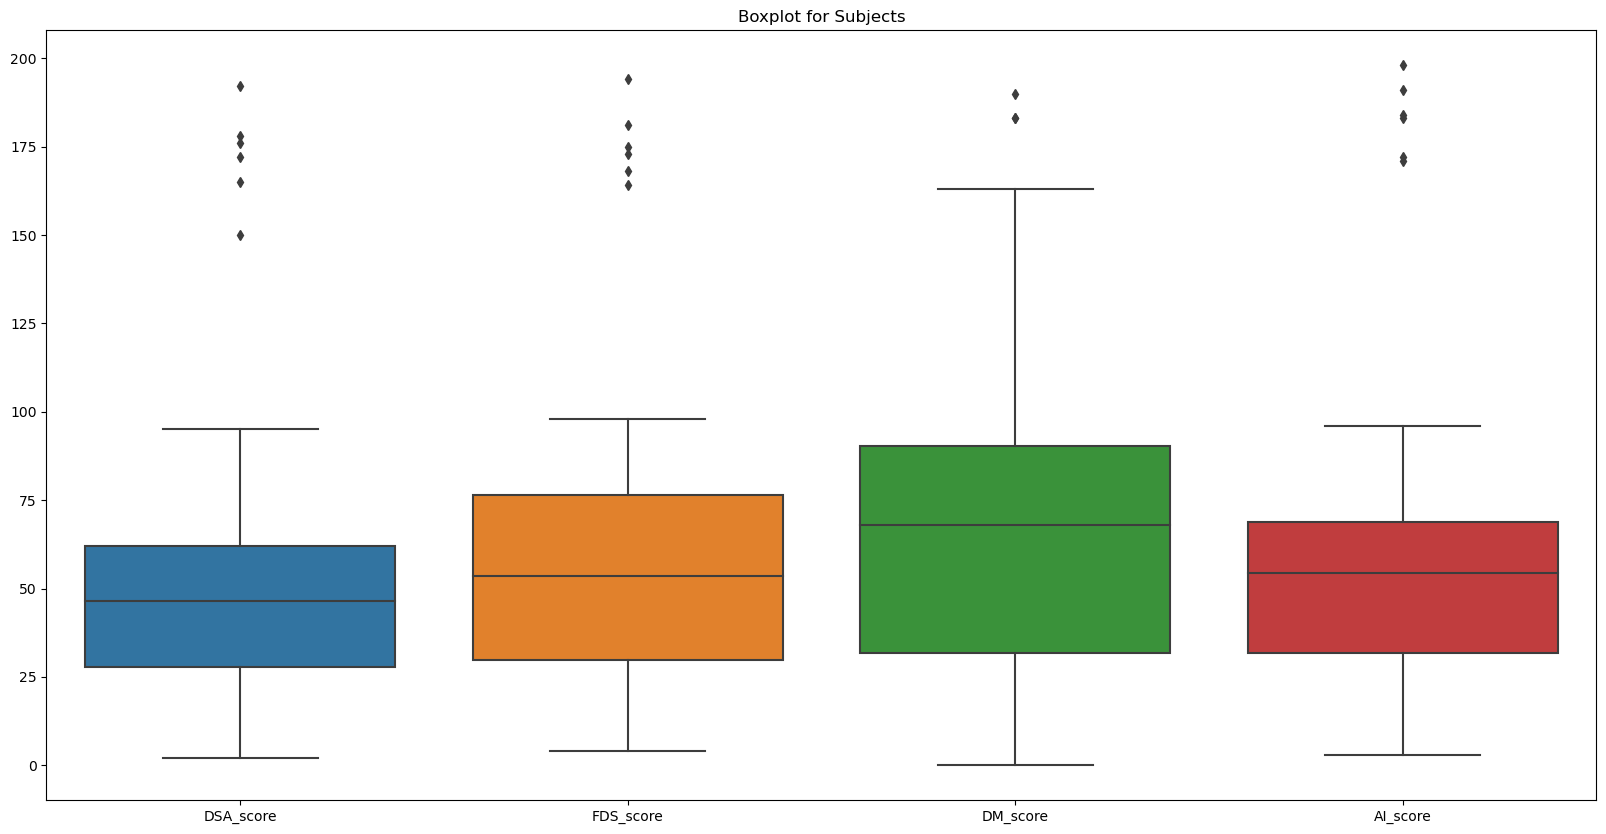

In [43]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['DSA_score', 'FDS_score', 'DM_score', 'AI_score']])
plt.title('Boxplot for Subjects')
plt.show()

In [37]:
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers_df = df.select_dtypes(include=np.number).apply(find_outliers)
sum_of_outliers = outliers_df.sum()
print("Sum of outliers in each column:")
print(sum_of_outliers)

Sum of outliers in each column:
Student_ID    0
DSA_score     6
FDS_score     6
DM_score      0
AI_score      6
dtype: int64


In [44]:
df.shape

(60, 6)

In [45]:
df = df.loc[~outliers_df.any(axis=1)]

In [46]:
df.shape

(54, 6)

In [47]:
df

,Student_ID,Name,DSA_score,FDS_score,DM_score,AI_score
0,1,Melissa Weaver,37.000000,78.000000,98.000000,17.000000
1,2,Jennifer Goodwin,56.181818,91.000000,47.000000,19.000000
2,3,Jonathan Decker,45.000000,19.000000,78.000000,61.000000
4,5,Kimberly Lawrence,12.000000,49.000000,7.000000,61.000000
6,7,Jimmy Gordon,2.000000,60.962963,93.000000,5.000000
8,9,Rebecca Green,17.000000,61.000000,90.000000,79.000000
9,10,Brandon Valenzuela,46.000000,34.000000,19.000000,65.000000
10,11,Elizabeth Johnson,56.181818,79.000000,22.000000,89.000000
11,12,Nicole Rodriguez,56.181818,43.000000,35.000000,68.000000
12,13,Erik Moody,7.000000,60.962963,70.000000,75.000000


In [49]:
float_columns = ['DSA_score', 'FDS_score', 'DM_score', 'AI_score']
df[float_columns] = df[float_columns].round().astype(int)

In [50]:
total_marks = 400  
df['Total'] = df[['DSA_score', 'FDS_score', 'DM_score', 'AI_score']].sum(axis=1)

In [51]:
df

,Student_ID,Name,DSA_score,FDS_score,DM_score,AI_score,Total
0,1,Melissa Weaver,37,78,98,17,230
1,2,Jennifer Goodwin,56,91,47,19,213
2,3,Jonathan Decker,45,19,78,61,203
4,5,Kimberly Lawrence,12,49,7,61,129
6,7,Jimmy Gordon,2,61,93,5,161
8,9,Rebecca Green,17,61,90,79,247
9,10,Brandon Valenzuela,46,34,19,65,164
10,11,Elizabeth Johnson,56,79,22,89,246
11,12,Nicole Rodriguez,56,43,35,68,202
12,13,Erik Moody,7,61,70,75,213


In [53]:
df['SGPA'] = (df['Total'] / total_marks) * 10
df['SGPA'] = df['SGPA'].round(1)

In [54]:
df

,Student_ID,Name,DSA_score,FDS_score,DM_score,AI_score,Total,SGPA
0,1,Melissa Weaver,37,78,98,17,230,5.8
1,2,Jennifer Goodwin,56,91,47,19,213,5.3
2,3,Jonathan Decker,45,19,78,61,203,5.1
4,5,Kimberly Lawrence,12,49,7,61,129,3.2
6,7,Jimmy Gordon,2,61,93,5,161,4.0
8,9,Rebecca Green,17,61,90,79,247,6.2
9,10,Brandon Valenzuela,46,34,19,65,164,4.1
10,11,Elizabeth Johnson,56,79,22,89,246,6.2
11,12,Nicole Rodriguez,56,43,35,68,202,5.0
12,13,Erik Moody,7,61,70,75,213,5.3


In [55]:
from scipy import stats

total_data = df['Total']

skewness_before = stats.skew(total_data)
print("Skewness Before Transformation = ",skewness_before)

transformed_data,lamda_value = stats.boxcox(total_data)
skewness_after = stats.skew(transformed_data)
print("Skewness After Transformation = ",skewness_after)

Skewness Before Transformation =  -0.6036561313079438
Skewness After Transformation =  -0.10723579185936942


Text(0.5, 1.0, 'Transformed Distribution (Skewness: -0.11)')

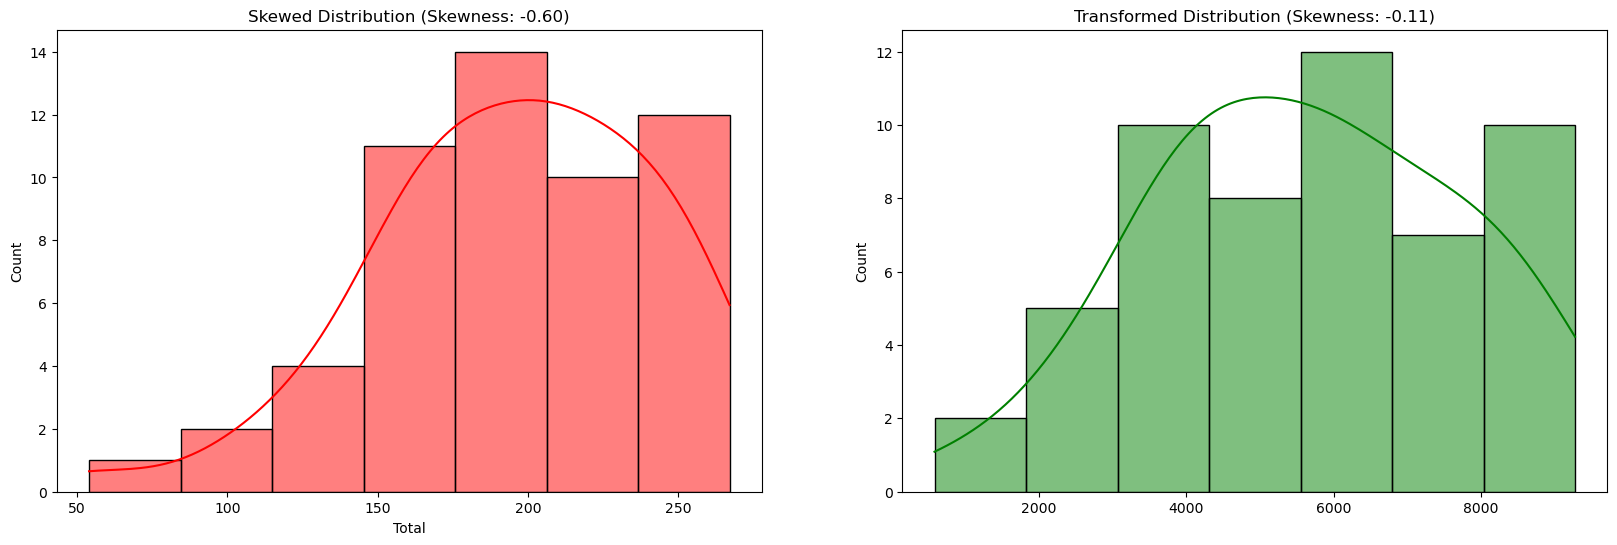

In [56]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(total_data, kde=True , color= 'red')
plt.title(f'Skewed Distribution (Skewness: {skewness_before:.2f})')


plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, color= 'green')
plt.title(f'Transformed Distribution (Skewness: {skewness_after:.2f})')